In [1]:
import numpy
import py_monte_carlo
from matplotlib import pyplot

In [2]:
def make_lattice(xsidelen=2, ysidelen=2):
    x = numpy.arange(xsidelen)
    y = numpy.arange(ysidelen)
    n = numpy.arange(4)
    X, Y, N = numpy.meshgrid(x, y, n)

    INDX = Y*len(x)*len(n) + X*len(n) + N
    SQR_BONDS = Y*len(x)*len(n) + X*len(n) + (N + 1)%len(n)

    edges = [((a, b), 1 if a%len(n) == 0 and b%len(n) == 1 else -1) 
             for a,b in zip(INDX.flatten(), SQR_BONDS.flatten())]
    
    for (sx, sy, sn) in zip(X.flatten(), Y.flatten(), N.flatten()):
        if sn == 1:
            a = sy*len(x)*len(n) + sx*len(n) + 1
            b = sy*len(x)*len(n) + ((sx+1)%len(x))*len(n) + 3
            edges.append(((a,b), -1))
        if sn == 0:
            a = sy*len(x)*len(n) + sx*len(n) + 0
            b = ((sy+1)%len(y))*len(x)*len(n) + sx*len(n) + 2
            edges.append(((a,b), -1))
    
    return edges

def get_cart(a, xsidelen=2, ysidelen=2, inner_size=0.1):
    y = a//(xsidelen*4)
    x = (a//4)%ysidelen
    rel = a % 4
    if rel == 0:
        return (x, y+inner_size)
    if rel == 1:
        return (x+inner_size, y)
    if rel == 2:
        return (x, y-inner_size)
    if rel == 3:
        return (x-inner_size, y)

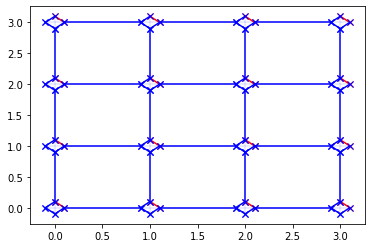

In [3]:
edges = make_lattice(4, 4)
for (a, b), j in edges:
    ax, ay = get_cart(a, 4, 4)
    bx, by = get_cart(b, 4, 4)
    
    if abs(ax - bx) >= 1.0 or abs(ay - by) >= 1.0:
        alpha = 0.1
    else:
        alpha = 1.0
    
    if j > 0:
        pyplot.plot([ax, bx], [ay, by], 'x-', c='r', alpha=alpha)
    if j < 0:
        pyplot.plot([ax, bx], [ay, by], 'x-', c='b', alpha=alpha)
        
pyplot.show()

In [4]:
edges = make_lattice(16, 16)
l = py_monte_carlo.Lattice(edges)

### Edit beta

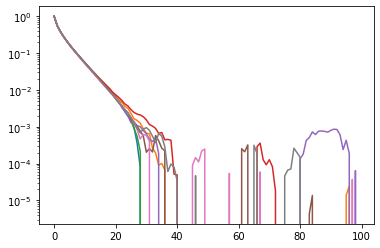

In [51]:
l.set_transverse_field(1.0)
autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(1.0, 10000, 8, 10000)

for i in range(autocorrs.shape[0]):
    pyplot.plot(autocorrs[i,:100])
pyplot.yscale('log')
pyplot.show()

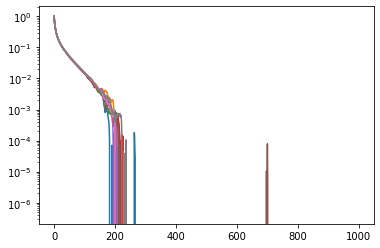

In [50]:
l.set_transverse_field(1.0)
autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(2.0, 10000, 8, 10000)

for i in range(autocorrs.shape[0]):
    pyplot.plot(autocorrs[i,:1000])
pyplot.yscale('log')
pyplot.show()

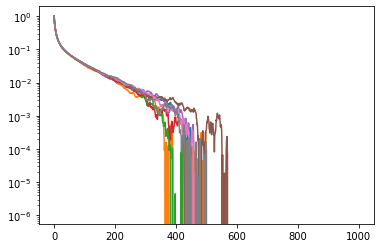

In [54]:
l.set_transverse_field(1.0)
autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(3.0, 10000, 8, 10000)

for i in range(autocorrs.shape[0]):
    pyplot.plot(autocorrs[i,:1000])
pyplot.yscale('log')
pyplot.show()

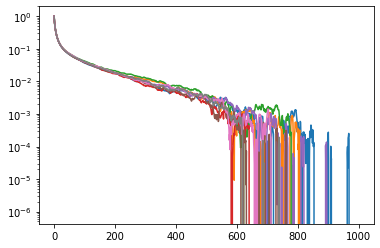

In [55]:
l.set_transverse_field(1.0)
autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(4.0, 10000, 8, 10000)

for i in range(autocorrs.shape[0]):
    pyplot.plot(autocorrs[i,:1000])
pyplot.yscale('log')
pyplot.show()

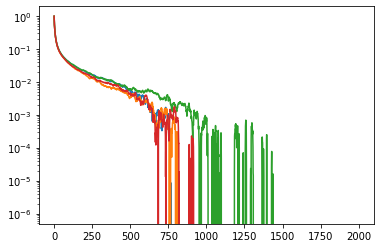

In [6]:
l.set_transverse_field(1.0)
autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(5.0, 10000, 4, 10000)

for i in range(autocorrs.shape[0]):
    pyplot.plot(autocorrs[i,:2000])
pyplot.yscale('log')
pyplot.show()

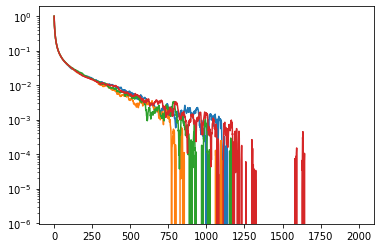

In [11]:
l.set_transverse_field(1.0)
autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(6.0, 10000, 4, 10000)

for i in range(autocorrs.shape[0]):
    pyplot.plot(autocorrs[i,:2000])
pyplot.yscale('log')
pyplot.show()

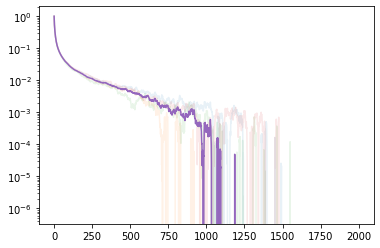

In [13]:
l.set_transverse_field(1.0)
autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(10.0, 10000, 4, 10000)

for i in range(autocorrs.shape[0]):
    pyplot.plot(autocorrs[i,:2000], alpha=0.1)
    
pyplot.plot(numpy.mean(autocorrs[:,:2000], axis=0))
    
pyplot.yscale('log')
pyplot.show()

## Edit gamma

1.0
0.5
0.1
0.05


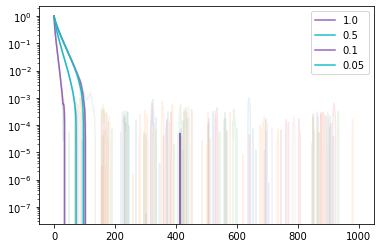

In [14]:
for gamma in [1.0, 0.5, 0.1, 0.05]:
    print(gamma)
    l.set_transverse_field(gamma)
    autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(1.0, 10000, 4, 10000)

    for i in range(autocorrs.shape[0]):
        pyplot.plot(autocorrs[i,:1000], alpha=0.1)
    pyplot.plot(numpy.mean(autocorrs[:,:1000], axis=0), label=str(gamma))
pyplot.legend()
pyplot.yscale('log')
pyplot.show()

1.0
0.5
0.1
0.05


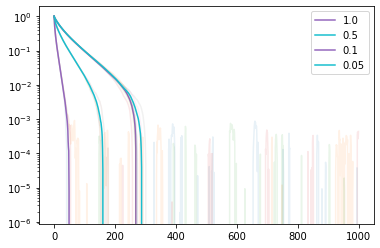

In [17]:
for gamma in [1.0, 0.5, 0.1, 0.05]:
    print(gamma)
    l.set_transverse_field(gamma)
    autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(1.2, 10000, 4, 10000)

    for i in range(autocorrs.shape[0]):
        pyplot.plot(autocorrs[i,:1000], alpha=0.1)
    pyplot.plot(numpy.mean(autocorrs[:,:1000], axis=0), label=str(gamma))
pyplot.legend()
pyplot.yscale('log')
pyplot.show()

1.0
0.5
0.1
0.05


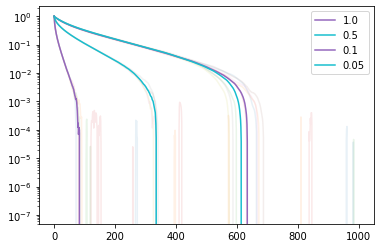

In [18]:
for gamma in [1.0, 0.5, 0.1, 0.05]:
    print(gamma)
    l.set_transverse_field(gamma)
    autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(1.4, 10000, 4, 10000)

    for i in range(autocorrs.shape[0]):
        pyplot.plot(autocorrs[i,:1000], alpha=0.1)
    pyplot.plot(numpy.mean(autocorrs[:,:1000], axis=0), label=str(gamma))
pyplot.legend()
pyplot.yscale('log')
pyplot.show()

1.0
0.5
0.1
0.05


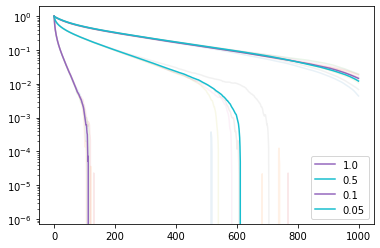

In [19]:
for gamma in [1.0, 0.5, 0.1, 0.05]:
    print(gamma)
    l.set_transverse_field(gamma)
    autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(1.6, 10000, 4, 10000)

    for i in range(autocorrs.shape[0]):
        pyplot.plot(autocorrs[i,:1000], alpha=0.1)
    pyplot.plot(numpy.mean(autocorrs[:,:1000], axis=0), label=str(gamma))
pyplot.legend()
pyplot.yscale('log')
pyplot.show()

1.0
0.5
0.1
0.05


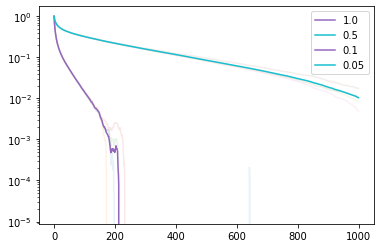

In [16]:
for gamma in [1.0, 0.5, 0.1, 0.05]:
    print(gamma)
    l.set_transverse_field(gamma)
    autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(2.0, 10000, 4, 10000)

    for i in range(autocorrs.shape[0]):
        pyplot.plot(autocorrs[i,:1000], alpha=0.1)
    pyplot.plot(numpy.mean(autocorrs[:,:1000], axis=0), label=str(gamma))
pyplot.legend()
pyplot.yscale('log')
pyplot.show()

1.0
0.5
0.1
0.05


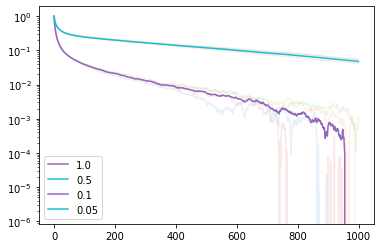

In [15]:
for gamma in [1.0, 0.5, 0.1, 0.05]:
    print(gamma)
    l.set_transverse_field(gamma)
    autocorrs = l.run_quantum_monte_carlo_and_measure_bond_autocorrelation(5.0, 10000, 4, 10000)

    for i in range(autocorrs.shape[0]):
        pyplot.plot(autocorrs[i,:1000], alpha=0.1)
    pyplot.plot(numpy.mean(autocorrs[:,:1000], axis=0), label=str(gamma))
pyplot.legend()
pyplot.yscale('log')
pyplot.show()

## Tempering!

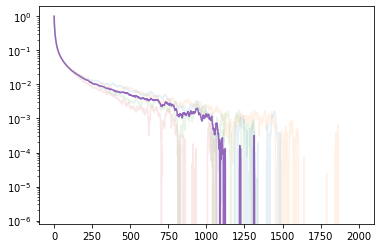

0

In [9]:
tempering_container = py_monte_carlo.LatticeTempering(edges)
for _ in range(4):
    tempering_container.add_graph(1.0, 10.0)

autocorrs = tempering_container.run_quantum_monte_carlo_and_measure_bond_autocorrelation(10000, 
                                                                                         sampling_wait_buffer=10000,
                                                                                         replica_swap_freq=1)

for i in range(autocorrs.shape[0]):
    pyplot.plot(autocorrs[i,:2000], alpha=0.1)
    
pyplot.plot(numpy.mean(autocorrs[:,:2000], axis=0))
    
pyplot.yscale('log')
pyplot.show()

tempering_container.get_total_swaps()

IT DID NOTHING!